In [1]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from PIL import Image

## less Important
from functools import partial
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score

## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras

## Loading the Data and Look at the Big Picture

`Only for training here`

In [2]:
train_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/train.csv')
train_images = Path(r'../input/arabic-hwr-ai-pro-intake1/train')

## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/train/00000...
1    ../input/arabic-hwr-ai-pro-intake1/train/00001...
2    ../input/arabic-hwr-ai-pro-intake1/train/00002...
3    ../input/arabic-hwr-ai-pro-intake1/train/00003...
4    ../input/arabic-hwr-ai-pro-intake1/train/00004...
Name: Filepath, dtype: object

In [3]:
train_labels['label'].unique()

array([24,  2, 17, 14, 19, 10, 23, 28, 18, 21, 11, 13, 15,  8, 16, 26,  4,
       12, 25,  1,  9,  5,  7,  6,  3, 20, 22, 27])

In [4]:
train_labels['label'] = train_labels['label'] - 1
train_labels['label'].unique()

array([23,  1, 16, 13, 18,  9, 22, 27, 17, 20, 10, 12, 14,  7, 15, 25,  3,
       11, 24,  0,  8,  4,  6,  5,  2, 19, 21, 26])

## Explore the Data

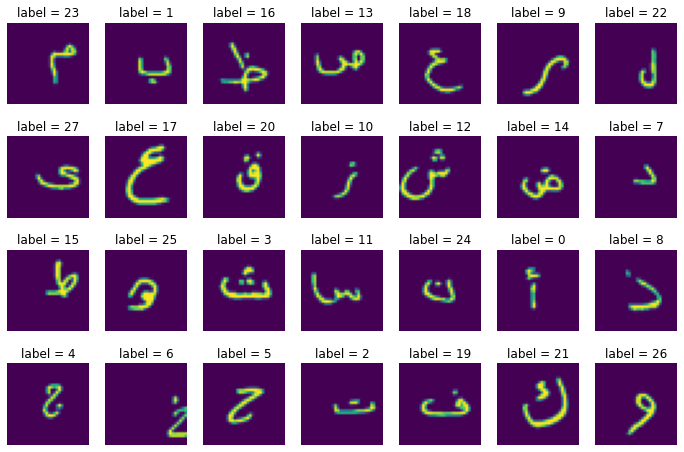

In [5]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}')
        img = plt.imread(train_images_paths.iloc[img_index[i]])
        plt.imshow(img)
        plt.axis('off')
        i+=1

In [6]:
np.asarray(plt.imread(train_images_paths.iloc[0])).shape

from PIL import Image
img = Image.open(train_images_paths.iloc[0]).convert('L')
np.asarray(img)/255

array([[0.11764706, 0.11764706, 0.11764706, ..., 0.11764706, 0.11764706,
        0.11764706],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.11764706, 0.11764706,
        0.11764706],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.11764706, 0.11764706,
        0.11764706],
       ...,
       [0.11764706, 0.11764706, 0.11764706, ..., 0.11764706, 0.11764706,
        0.11764706],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.11764706, 0.11764706,
        0.11764706],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.11764706, 0.11764706,
        0.11764706]])

In [7]:
print('Number of Instances in train_set =>', len(train_images_paths))
print('Number of Instances in train_labels =>', len(train_labels))

print()

img = plt.imread(train_images_paths.iloc[img_index[20]])
print('shape of each Image is =>', img.shape)

img

Number of Instances in train_set => 13440
Number of Instances in train_labels => 13440

shape of each Image is => (32, 32, 4)


array([[[0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        ...,
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ]],

       [[0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        ...,
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ]],

       [[0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        ...,
        [0.26666668, 0.00392157, 0.32941177, 1.        ],
        [0.26666668, 0.003921

## Data Preprocessing

In [8]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((13440, 64, 64), dtype=np.float32)
newsize = (64, 64)

for idx, path in enumerate(train_images_paths):
    img = Image.open(path).convert('L')
    img = img.resize(newsize)
    img = np.asarray(img)/255
    train_full_set[idx] = img
    
train_full_set = train_full_set.reshape(train_full_set.shape[0], train_full_set.shape[1],\
                                        train_full_set.shape[2], 1)
print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (13440, 64, 64, 1)
train_full_labels.shape => (13440,)


## Split the Data

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels,\
                                        test_size=0.1, stratify=train_full_labels, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (12096, 64, 64, 1)
X_valid.shape => (1344, 64, 64, 1)
y_train.shape => (12096,)
y_valid.shape => (1344,)


In [10]:
y_valid[y_valid == 1].shape

(48,)

In [11]:
np.random.seed(10)

## Model Training

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Dense(28, activation='softmax'))
    
  # Compile model
  model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

In [13]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')
model.summary()

2021-11-07 11:58:41.198270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

2021-11-07 11:58:41.316896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 11:58:41.317634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 11:58:41.318774: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-07 11:58:41.319995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='weights6.hdf5', verbose=1, save_best_only=True)
early_stopp = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=100, batch_size=20, verbose=1)
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_valid, y_valid),
#                     epochs=100, batch_size=20, verbose=1, callbacks=[checkpointer, early_stopp])

2021-11-07 11:58:44.378569: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-07 11:58:45.909434: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


605/605 [==============================] - 10s 5ms/step - loss: 1.2532 - accuracy: 0.6726 - val_loss: 2.6396 - val_accuracy: 0.2046
Epoch 2/100
605/605 [==============================] - 3s 5ms/step - loss: 0.3407 - accuracy: 0.9176 - val_loss: 0.2908 - val_accuracy: 0.9301
Epoch 3/100
605/605 [==============================] - 3s 5ms/step - loss: 0.2216 - accuracy: 0.9406 - val_loss: 2.5127 - val_accuracy: 0.5171
Epoch 4/100
605/605 [==============================] - 4s 6ms/step - loss: 0.1709 - accuracy: 0.9554 - val_loss: 0.4515 - val_accuracy: 0.8646
Epoch 5/100
605/605 [==============================] - 3s 5ms/step - loss: 0.1386 - accuracy: 0.9611 - val_loss: 0.7180 - val_accuracy: 0.8140
Epoch 6/100
605/605 [==============================] - 3s 5ms/step - loss: 0.1191 - accuracy: 0.9666 - val_loss: 1.2965 - val_accuracy: 0.6674
Epoch 7/100
605/605 [==============================] - 3s 5ms/step - loss: 0.1054 - accuracy: 0.9700 - val_loss: 1.0701 - val_accuracy: 0.6972
Epoch 8/10

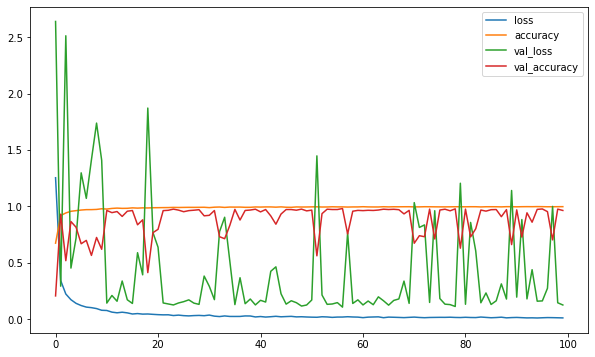

In [15]:
pd.DataFrame(history.history).plot(figsize=(10, 6));

In [16]:
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

loss_all_data => 0.02040156163275242
acc_all_data => 0.9944940209388733


## Evaluation on Testing DataSet

In [17]:
test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/test')

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/test/00000.png
1    ../input/arabic-hwr-ai-pro-intake1/test/00001.png
2    ../input/arabic-hwr-ai-pro-intake1/test/00002.png
3    ../input/arabic-hwr-ai-pro-intake1/test/00003.png
4    ../input/arabic-hwr-ai-pro-intake1/test/00004.png
Name: Filepath, dtype: object

In [18]:
print('Number of Instances in test_set is', len(test_images_paths))

Number of Instances in test_set is 3360


In [19]:
test_full_set = np.empty((3360, 64, 64), dtype=np.float32)
newsize = (64, 64)

for idx, path in enumerate(test_images_paths):
    img = Image.open(path).convert('L')
    img = img.resize(newsize)
    img = np.asarray(img)/255
    test_full_set[idx] = img
    
test_full_set = test_full_set.reshape(test_full_set.shape[0], test_full_set.shape[1],\
                                        test_full_set.shape[2], 1)
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 64, 64, 1)


In [20]:
y_preds_classes = np.argmax(model.predict(test_full_set) , axis=-1)

In [21]:
y_preds_classes = y_preds_classes + 1
y_preds_classes.shape

(3360,)

In [22]:
test_labels['label'] = y_preds_classes

<AxesSubplot:>

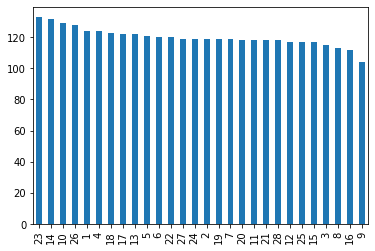

In [23]:
test_labels['label'].value_counts().plot(kind='bar')

In [24]:
test_labels[['id', 'label']].to_csv('/kaggle/working/submission.csv', index=False)

## Done :D